In [4]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline

# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 데이터 불러오기
df = pd.read_csv("/Users/crlee/pandas/서울시_골목상권_재범주.csv",encoding='cp949',low_memory=False)

# 필요한 열만 추출
select_col = [ '프랜차이즈_점포_수','시군구_명','상권_코드_명']
df2 = df[select_col]
df2

,프랜차이즈_점포_수,시군구_명,상권_코드_명
0,15,강북구,4.19민주묘지역 2번
1,4,강북구,KT&G 북부지사
2,13,강북구,가오리역 1번
3,6,강북구,가오리역 2번
4,9,강북구,강북구청
...,...,...,...
1082,2,서초구,청계산원터골
1083,0,서초구,청계산입구역 2번(내곡동주민센터)
1084,1,서초구,한국상담대학원대학교
1085,2,서초구,한전아트센터


In [5]:
# # 시군구 명으로 합계
# df2 = df2.groupby('시군구_명')['프랜차이즈_점포_수'].sum().reset_index()
# df2

In [7]:
# 내림차순 정렬
df3 = df2.sort_values('프랜차이즈_점포_수', ascending=False)
df3

,프랜차이즈_점포_수,시군구_명,상권_코드_명
835,75,강남구,대청초등학교
499,74,용산구,숙대입구
581,62,송파구,삼전역 1번
642,62,서대문구,명지대학교
220,58,성북구,안암역 3번
...,...,...,...
560,0,송파구,개미어린이공원
450,0,영등포구,서울시립영등포장애인복지관
341,0,관악구,관악동부센트레빌아파트(은천로35라길)
602,0,송파구,풍납초등학교(풍납백제문화공원)


In [8]:
# 상위 250 개 추출

top_250 = df3.head(250)
top_250


,프랜차이즈_점포_수,시군구_명,상권_코드_명
835,75,강남구,대청초등학교
499,74,용산구,숙대입구
581,62,송파구,삼전역 1번
642,62,서대문구,명지대학교
220,58,성북구,안암역 3번
...,...,...,...
517,16,용산구,해방촌 남동측
774,16,은평구,구산역 4번
885,16,광진구,군자역 5번
393,16,금천구,금산초등학교(금천고등학교)


In [9]:
# 상위 250개의 시군구 합 
df4 = top_250.groupby('시군구_명')['프랜차이즈_점포_수'].sum().reset_index()
df4

,시군구_명,프랜차이즈_점포_수
0,강남구,232
1,강동구,405
2,강북구,56
3,강서구,505
4,관악구,390
5,광진구,261
6,구로구,298
7,금천구,187
8,노원구,348
9,도봉구,321


In [10]:
# 내림차순 정렬
df5 = df4.sort_values('프랜차이즈_점포_수', ascending=False)
df5

,시군구_명,프랜차이즈_점포_수
3,강서구,505
17,송파구,463
1,강동구,405
4,관악구,390
24,중랑구,348
8,노원구,348
9,도봉구,321
21,은평구,302
6,구로구,298
16,성북구,293


,시군구_명,프랜차이즈_점포_수
3,강서구,505
17,송파구,463
1,강동구,405
4,관악구,390
24,중랑구,348


<BarContainer object of 5 artists>

Text(0.5, 1.0, '프렌차이즈 점포 수 상위 5개 구')

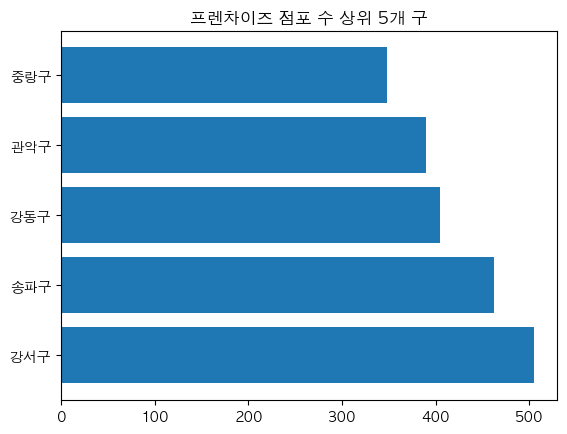

In [13]:
# 상위 5개 구
top_5 = df5.head(5)
top_5

# 시각화
plt.barh(top_5['시군구_명'], top_5['프랜차이즈_점포_수'])

# 그래프에 제목
plt.title('프렌차이즈 점포 수 상위 5개 구')